In [3]:
import numpy as np
import bm3d
from tqdm.notebook import tqdm
import matplotlib
import matplotlib.pyplot as plt
import cv2  # only use this to read image
from PIL import Image  # only use to display image

import utils

In [15]:
a = np.array([1,2,3])
np.stack((a, a, a))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [4]:
M = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
])
M

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [12]:
a1 = np.array([1, 2, 3])
a2 = np.array([100, 3, 300])
a3 = np.array([-1, 40, 1000])
np.max(np.stack((a1, a2, a3)), axis=0)

array([ 100,   40, 1000])

In [5]:
M[..., 1]

array([[2, 5, 8],
       [2, 5, 8],
       [2, 5, 8]])

In [6]:
M - [1, 2, 3]

array([[[0, 0, 0],
        [3, 3, 3],
        [6, 6, 6]],

       [[0, 0, 0],
        [3, 3, 3],
        [6, 6, 6]],

       [[0, 0, 0],
        [3, 3, 3],
        [6, 6, 6]]])

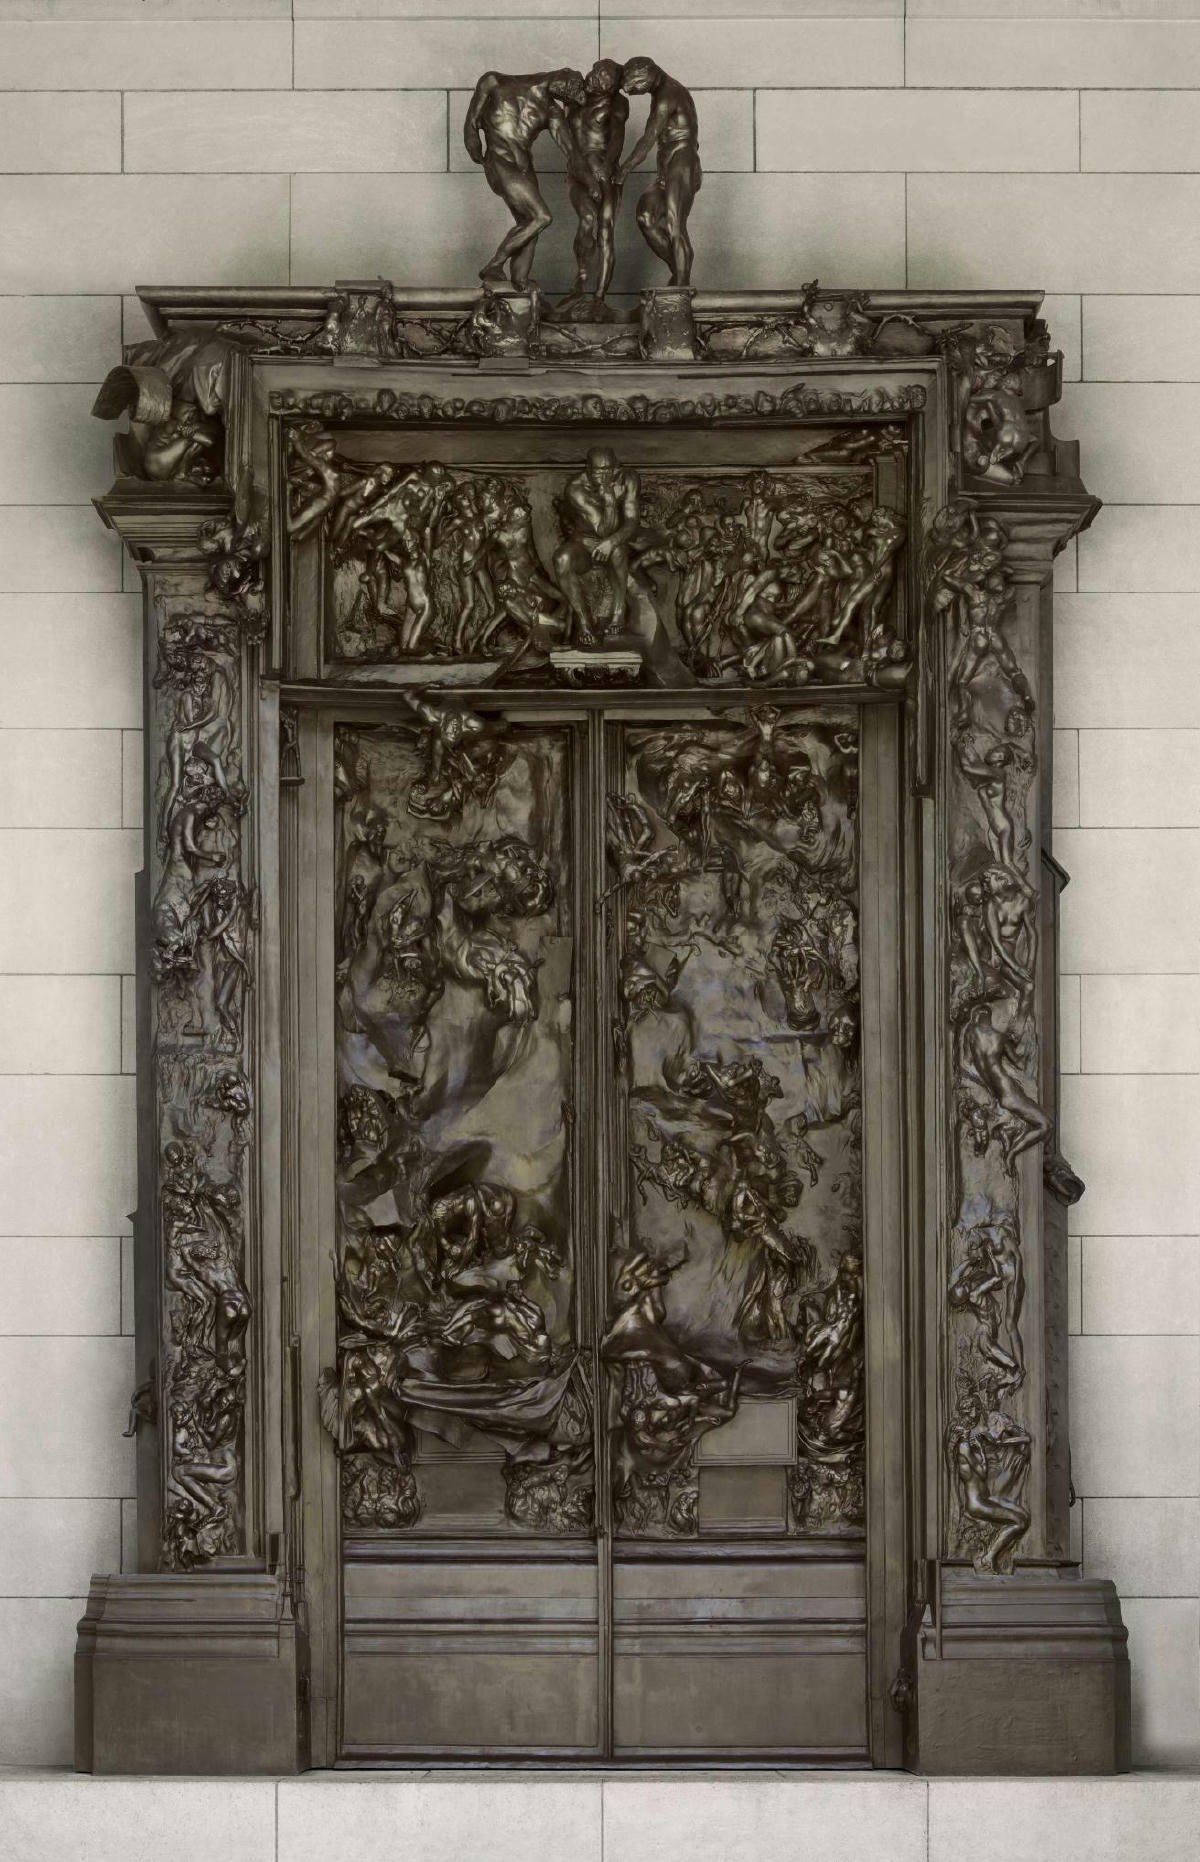

In [30]:
# only use cv2 in this cell
original = cv2.imread("data/gates_of_hell.jpeg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # converge BGR to RGB array
utils.display(original)

In [32]:
cleaned = bm3d.bm3d(original, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

In [34]:
cleaned == original

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

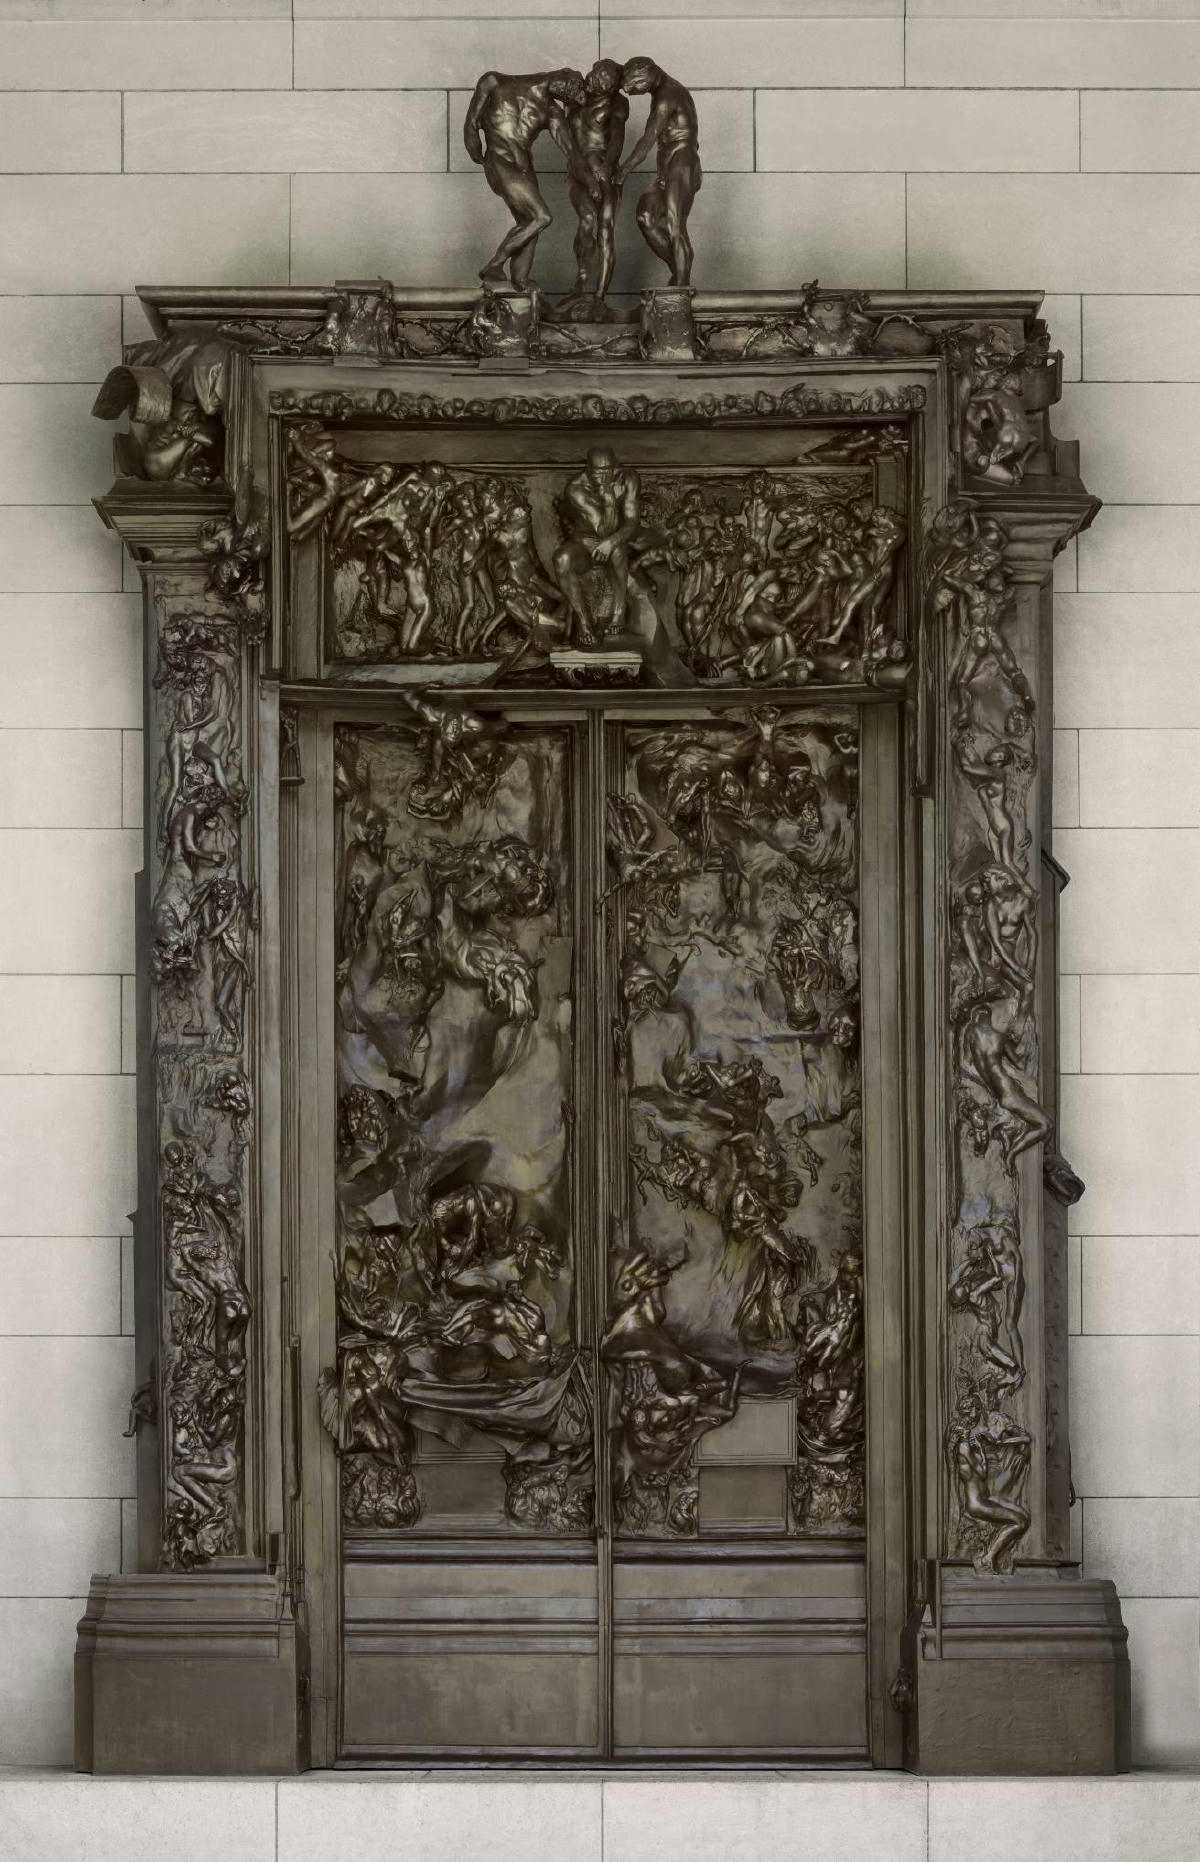

In [33]:
utils.display(cleaned)

In [2]:
RNG = np.random.default_rng()

In [3]:
RNG.integers(low=0, high=255, size=3)

array([201, 109, 146])

In [4]:
M = np.arange(16).reshape(4, 4)
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [5]:
np.mean(np.array([ [0, 0, 0], [100, 200, 300] ]), axis=0)

array([ 50., 100., 150.])

In [6]:
list(zip(*np.where(M)))

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [7]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

radius = 2
padder = -100
padded_M = np.pad(M, radius, pad_with, padder=padder)
padded_M

array([[-100, -100, -100, -100, -100, -100, -100, -100],
       [-100, -100, -100, -100, -100, -100, -100, -100],
       [-100, -100,    0,    1,    2,    3, -100, -100],
       [-100, -100,    4,    5,    6,    7, -100, -100],
       [-100, -100,    8,    9,   10,   11, -100, -100],
       [-100, -100,   12,   13,   14,   15, -100, -100],
       [-100, -100, -100, -100, -100, -100, -100, -100],
       [-100, -100, -100, -100, -100, -100, -100, -100]])

In [8]:
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [9]:
max_row, max_col = M.shape
shapes = set()
for i, row in enumerate(M):
    y_min = max(0, i - radius)
    y_max = min(max_row, i + radius + 1)
    print(f"{y_min=}, {y_max=}")
    for j, elem in enumerate(row):
        x_min = max(0, j - radius)
        x_max = min(max_col, j + radius + 1)
        print(f"{x_min=}, {x_max=}")
        window = M[y_min:y_max, x_min:x_max]
        center = window[i - y_min, j - x_min]
        print(window)
        print(f"{i=}, {j=}")
        print(f"{center=}, {M[i, j]=}")
        accurate_center = (center == M[i, j])
        print(f"{accurate_center=}")
        print()
        shapes.add(window.shape)
        shapes.add(accurate_center)
print(shapes)

y_min=0, y_max=3
x_min=0, x_max=3
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]
i=0, j=0
center=0, M[i, j]=0
accurate_center=True

x_min=0, x_max=4
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
i=0, j=1
center=1, M[i, j]=1
accurate_center=True

x_min=0, x_max=4
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
i=0, j=2
center=2, M[i, j]=2
accurate_center=True

x_min=1, x_max=4
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
i=0, j=3
center=3, M[i, j]=3
accurate_center=True

y_min=0, y_max=4
x_min=0, x_max=3
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
i=1, j=0
center=4, M[i, j]=4
accurate_center=True

x_min=0, x_max=4
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
i=1, j=1
center=5, M[i, j]=5
accurate_center=True

x_min=0, x_max=4
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
i=1, j=2
center=6, M[i, j]=6
accurate_center=True

x_min=1, x_max=4
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]
i=1, j=3
center=7, M[i, j]=7
accurate_center=True

y_min=0, y_max=4
x_min=0, x_max=3
[[

In [10]:
max_row, max_col = padded_M.shape
shapes = set()
for i, row in enumerate(padded_M):
    if i < radius or i >= radius + M.shape[0]:  # skip window if center is padding
        continue
    # y_min = max(0, i - radius)
    # y_max = min(max_row, i + radius + 1)
    # print(f"{y_min=}, {y_max=}")
    for j, elem in enumerate(row):
        if j < radius or j >= radius + M.shape[1]:
            continue
        # x_min = max(0, j - radius)
        # x_max = min(max_col, j + radius + 1)
        # print(f"{x_min=}, {x_max=}")
        # window = padded_M[y_min:y_max, x_min:x_max]
        # center = window[i - y_min, j - x_min]
        window = padded_M[i - radius: i + radius + 1, j - radius: j + radius + 1]
        center = window[radius, radius]
        print(window)
        print(f"{i=}, {j=}")
        print(f"{center=}", f"{padded_M[i, j]=}")
        accurate_center = (center != padder) and (padded_M[i, j] == center)
        print(f"{accurate_center=}")
        print()
        shapes.add(window.shape)
        shapes.add(accurate_center)
print(shapes)

[[-100 -100 -100 -100 -100]
 [-100 -100 -100 -100 -100]
 [-100 -100    0    1    2]
 [-100 -100    4    5    6]
 [-100 -100    8    9   10]]
i=2, j=2
center=0 padded_M[i, j]=0
accurate_center=True

[[-100 -100 -100 -100 -100]
 [-100 -100 -100 -100 -100]
 [-100    0    1    2    3]
 [-100    4    5    6    7]
 [-100    8    9   10   11]]
i=2, j=3
center=1 padded_M[i, j]=1
accurate_center=True

[[-100 -100 -100 -100 -100]
 [-100 -100 -100 -100 -100]
 [   0    1    2    3 -100]
 [   4    5    6    7 -100]
 [   8    9   10   11 -100]]
i=2, j=4
center=2 padded_M[i, j]=2
accurate_center=True

[[-100 -100 -100 -100 -100]
 [-100 -100 -100 -100 -100]
 [   1    2    3 -100 -100]
 [   5    6    7 -100 -100]
 [   9   10   11 -100 -100]]
i=2, j=5
center=3 padded_M[i, j]=3
accurate_center=True

[[-100 -100 -100 -100 -100]
 [-100 -100    0    1    2]
 [-100 -100    4    5    6]
 [-100 -100    8    9   10]
 [-100 -100   12   13   14]]
i=3, j=2
center=4 padded_M[i, j]=4
accurate_center=True

[[-100 -10

In [11]:
# TODO: redo window code
max_row, max_col = padded_M.shape
for i, row in enumerate(padded_M):
    ymin = max(0, i - radius)
    ymax = min(max_row, i + radius)
    for j, center in enumerate(row):
        xmin = max(0, j - radius)
        xmax = min(max_col, j + radius)
        window = padded_M[ymin:ymax, xmin:xmax]
        print(window)
        print()

[[-100 -100]
 [-100 -100]]

[[-100 -100 -100]
 [-100 -100 -100]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]]

[[-100 -100 -100]
 [-100 -100 -100]]

[[-100 -100]
 [-100 -100]
 [-100 -100]]

[[-100 -100 -100]
 [-100 -100 -100]
 [-100 -100    0]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]
 [-100 -100    0    1]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]
 [-100    0    1    2]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]
 [   0    1    2    3]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]
 [   1    2    3 -100]]

[[-100 -100 -100 -100]
 [-100 -100 -100 -100]
 [   2    3 -100 -100]]

[[-100 -100 -100]
 [-100 -100 -100]
 [   3 -100 -100]]

[[-100 -100]
 [-100 -100]
 [-100 -100]
 [-100 -100]]

[[-100 -100 -100]
 [-100 -100 -100]
 [-100 -100    0]
 [-100 -100    4]]

[[-100 -100 -100 -10

In [12]:
A = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
np.sum(A == A)

9

In [14]:
A[[0, 1, 2], [2, 2, 2]]

array([2, 5, 8])

In [15]:
for source in list(zip(*np.where(A < 5))):
    print(type(source))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [16]:
A.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7,
       7, 7, 8, 8, 8])

In [17]:
np.where(A < 5)

(array([0, 0, 0, 1, 1]), array([0, 1, 2, 0, 1]))

In [18]:
sliding_window_view = np.lib.stride_tricks.sliding_window_view(A, window_shape=(2, 2))
for window in sliding_window_view:
    print(window)
    print("---")

[[[0 1]
  [3 4]]

 [[1 2]
  [4 5]]]
---
[[[3 4]
  [6 7]]

 [[4 5]
  [7 8]]]
---


In [19]:
A[A < 5].sum()

10

In [20]:
A.mean(axis=0)  # columns

array([3., 4., 5.])

In [21]:
A.mean(axis=1)  # rows

array([1., 4., 7.])

In [22]:
B = np.array([
    [[0, 0, 0], [1, 1, 1], [2, 2, 2]],
    [[3, 3, 3], [4, 4, 4], [5, 5, 5]],
    [[6, 6, 6], [7, 7, 7], [8, 8, 8]]
])

In [23]:
mean = B.mean(axis=2)
mean

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [24]:
np.mean(B, axis=(0, 1))

array([4., 4., 4.])

In [25]:
np.repeat(mean, 3).reshape(B.shape)

array([[[0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [4., 4., 4.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [7., 7., 7.],
        [8., 8., 8.]]])